<h2>Sales Forecasting

<h3>Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import scipy.stats as stats

<h3>Importing Datasets

In [2]:
#importing datasets using read_csv function
train_df = pd.read_csv('/Users/louiserooney/Downloads/input/store-sales-time-series-forecasting/train.csv')
test_df = pd.read_csv('/Users/louiserooney/Downloads/input/store-sales-time-series-forecasting/test.csv')
oil_df = pd.read_csv('/Users/louiserooney/Downloads/input/store-sales-time-series-forecasting/oil.csv')
transaction_df = pd.read_csv('/Users/louiserooney/Downloads/input/store-sales-time-series-forecasting/transactions.csv')
stores_df = pd.read_csv('/Users/louiserooney/Downloads/input/store-sales-time-series-forecasting/stores.csv')
holiday_event_df = pd.read_csv('/Users/louiserooney/Downloads/input/store-sales-time-series-forecasting/holidays_events.csv')

In [3]:
#understanding the data using head function
train_df.head()

,id,date,store_nbr,family,sales,onpromotion
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0
1,1,2013-01-01,1,BABY CARE,0.0,0
2,2,2013-01-01,1,BEAUTY,0.0,0
3,3,2013-01-01,1,BEVERAGES,0.0,0
4,4,2013-01-01,1,BOOKS,0.0,0


In [4]:
test_df.head()

,id,date,store_nbr,family,onpromotion
0,3000888,2017-08-16,1,AUTOMOTIVE,0
1,3000889,2017-08-16,1,BABY CARE,0
2,3000890,2017-08-16,1,BEAUTY,2
3,3000891,2017-08-16,1,BEVERAGES,20
4,3000892,2017-08-16,1,BOOKS,0


In [5]:
oil_df.head()

,date,dcoilwtico
0,2013-01-01,NaN
1,2013-01-02,93.14
2,2013-01-03,92.97
3,2013-01-04,93.12
4,2013-01-07,93.20


In [6]:
transaction_df.head()

,date,store_nbr,transactions
0,2013-01-01,25,770
1,2013-01-02,1,2111
2,2013-01-02,2,2358
3,2013-01-02,3,3487
4,2013-01-02,4,1922


In [7]:
stores_df.head()

,store_nbr,city,state,type,cluster
0,1,Quito,Pichincha,D,13
1,2,Quito,Pichincha,D,13
2,3,Quito,Pichincha,D,8
3,4,Quito,Pichincha,D,9
4,5,Santo Domingo,Santo Domingo de los Tsachilas,D,4


In [8]:
holiday_event_df.head()

,date,type,locale,locale_name,description,transferred
0,2012-03-02,Holiday,Local,Manta,Fundacion de Manta,False
1,2012-04-01,Holiday,Regional,Cotopaxi,Provincializacion de Cotopaxi,False
2,2012-04-12,Holiday,Local,Cuenca,Fundacion de Cuenca,False
3,2012-04-14,Holiday,Local,Libertad,Cantonizacion de Libertad,False
4,2012-04-21,Holiday,Local,Riobamba,Cantonizacion de Riobamba,False


<h6>The sales column is the target variable. 

<h3>Merging datasets holiday_event_df, stores_df, oil_df & train_df

In [10]:
train_df = train_df.merge(stores_df, on ='store_nbr')
train_df = train_df.merge(oil_df, on ='date', how='left')
holiday_event_df = holiday_event_df.rename(columns={'type': 'holiday_type'})
train_df = train_df.merge(holiday_event_df, on='date', how='left')

In [12]:
#checking the data using head function
train_df.head(3)

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster,dcoilwtico,holiday_type,locale,locale_name,description,transferred
0,0,2013-01-01,1,AUTOMOTIVE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
1,1,2013-01-01,1,BABY CARE,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False
2,2,2013-01-01,1,BEAUTY,0.0,0,Quito,Pichincha,D,13,NaN,Holiday,National,Ecuador,Primer dia del ano,False


In [13]:
#checking information about DataFrame using info function 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 16 columns):
 #   Column        Dtype  
---  ------        -----  
 0   id            int64  
 1   date          object 
 2   store_nbr     int64  
 3   family        object 
 4   sales         float64
 5   onpromotion   int64  
 6   city          object 
 7   state         object 
 8   type          object 
 9   cluster       int64  
 10  dcoilwtico    float64
 11  holiday_type  object 
 12  locale        object 
 13  locale_name   object 
 14  description   object 
 15  transferred   object 
dtypes: float64(2), int64(4), object(10)
memory usage: 396.1+ MB


<h3>Missing Values Detection

In [14]:
train_df.isnull().sum()

id                    0
date                  0
store_nbr             0
family                0
sales                 0
onpromotion           0
city                  0
state                 0
type                  0
cluster               0
dcoilwtico       955152
holiday_type    2551824
locale          2551824
locale_name     2551824
description     2551824
transferred     2551824
dtype: int64

In [15]:
#percentage of missing values in train_df 

missing_percentages = train_df.isnull().sum()/ len(train_df) * 100 

print(missing_percentages)

id               0.000000
date             0.000000
store_nbr        0.000000
family           0.000000
sales            0.000000
onpromotion      0.000000
city             0.000000
state            0.000000
type             0.000000
cluster          0.000000
dcoilwtico      31.271879
holiday_type    83.547258
locale          83.547258
locale_name     83.547258
description     83.547258
transferred     83.547258
dtype: float64


In [16]:
# remove columns that are having more than 30% missing values

columns_to_delete = missing_percentages[missing_percentages > 30].index

train_df = train_df.drop(columns=columns_to_delete)

In [17]:
# Checking Data after removing missing values
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3054348 entries, 0 to 3054347
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   type         object 
 9   cluster      int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 256.3+ MB


<h3>Checking for Duplicates

In [18]:
train_df.duplicated().any()

True

In [19]:
dupes=train_df.duplicated()

#dupes
sum(dupes)

53460

In [20]:
#dropping duplicate values

train_df = train_df.drop_duplicates()
train_df

,id,date,store_nbr,family,sales,onpromotion,city,state,type,cluster
0,0,2013-01-01,1,AUTOMOTIVE,0.000,0,Quito,Pichincha,D,13
1,1,2013-01-01,1,BABY CARE,0.000,0,Quito,Pichincha,D,13
2,2,2013-01-01,1,BEAUTY,0.000,0,Quito,Pichincha,D,13
3,3,2013-01-01,1,BEVERAGES,0.000,0,Quito,Pichincha,D,13
4,4,2013-01-01,1,BOOKS,0.000,0,Quito,Pichincha,D,13
...,...,...,...,...,...,...,...,...,...,...
3054343,3000883,2017-08-15,9,POULTRY,438.133,0,Quito,Pichincha,B,6
3054344,3000884,2017-08-15,9,PREPARED FOODS,154.553,1,Quito,Pichincha,B,6
3054345,3000885,2017-08-15,9,PRODUCE,2419.729,148,Quito,Pichincha,B,6
3054346,3000886,2017-08-15,9,SCHOOL AND OFFICE SUPPLIES,121.000,8,Quito,Pichincha,B,6


In [21]:
train_df.duplicated().any()

False

In [22]:
test_df.duplicated().any()

False

<h3>Checking if there are still any missing values present in the train_df

In [23]:
train_df.isnull().sum()

id             0
date           0
store_nbr      0
family         0
sales          0
onpromotion    0
city           0
state          0
type           0
cluster        0
dtype: int64

<h3>Exlporatory Data Analysis

In [24]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000888 entries, 0 to 3054347
Data columns (total 10 columns):
 #   Column       Dtype  
---  ------       -----  
 0   id           int64  
 1   date         object 
 2   store_nbr    int64  
 3   family       object 
 4   sales        float64
 5   onpromotion  int64  
 6   city         object 
 7   state        object 
 8   type         object 
 9   cluster      int64  
dtypes: float64(1), int64(4), object(5)
memory usage: 251.8+ MB


<h3>Questions or Analysis

1. Which family is having the highest sales?

2. Which city is having the most number of customers?

<h3>1. Which family is having the highest sales?

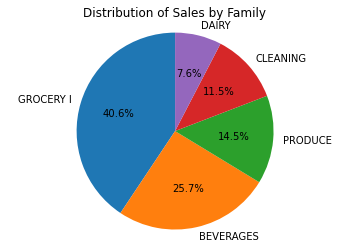

In [25]:
#Pie chart

# Group the data by family and calculate the total sales for each family
family_sales = train_df.groupby('family')['sales'].sum()

# Sort the families based on sales in descending order
family_sales_sorted = family_sales.sort_values(ascending=False)

# Get the top 5 families with the highest sales
top_families = family_sales_sorted.head(5)

# Create the pie chart
plt.pie(top_families, labels=top_families.index, autopct='%1.1f%%', startangle=90)

plt.title('Distribution of Sales by Family')

plt.axis('equal')  
plt.show()

<b>Based on the pie chart above, the GROCERY I is having the highest sales and DAIRY having the lowest sales among all the categories.

<h3>2. Which city is having the most number of customers?

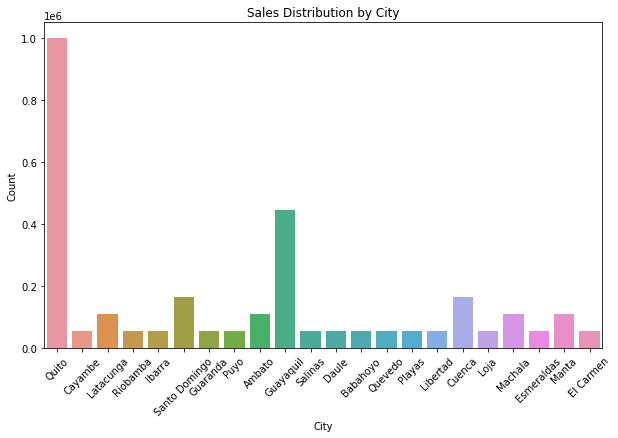

In [26]:
#Count Plot 

# Create a count plot
plt.figure(figsize=(10, 6))  # Set the figure size
sns.countplot(data=train_df, x='city')

plt.xlabel('City')
plt.ylabel('Count')
plt.title('Sales Distribution by City')

plt.xticks(rotation=45)

plt.show()

<b>Based on the count plot above, the Quito city has the maximum sales.